In [2]:
# Mohammad Ali Zahir
# Student ID: 40077619
# COMP 333 - Data Analytics
# Objective: Write your own Python functions quantDDA() and vizDDA() within the notebook, and illustrate their use within the notebook.
# Output: Visualization of all the functions

## Step 1:  Quantitative Descriptions (6 marks)

In [3]:
# Import required librairies
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
# Creating all the dataframes from the datasets 
tips = pd.read_csv('./data/tips.csv')
gender_sub = pd.read_csv('./data/gender_submission.csv')
iris = pd.read_csv('./data/iris.csv')


In [5]:

def quantDDA(df):
    
    # Creating an empty dictionary to store the values in
    description_dict =  {}

    # Loops through all the keys in the dataset and records their statistics one by one
    for key in df.columns:
        temp_dict = {}
        observations = df[key].shape[0]
        unique_entries = df[key].nunique()
        missing_entries = df[key].isna().sum()
        entries = observations - missing_entries
        mode = df.mode()[key].dropna().tolist()

        # Here we deal with non-numeric values. If the column contains a non-numeric value, we do not include it
        if df[key].dtype.kind in 'ifc' or df[key].dtype == np.bool_:
            mean = df.mean(numeric_only=True)[key]
            std = df.std(numeric_only=True)[key]
            max = df.max(numeric_only=True)[key]
            min = df.min(numeric_only=True)[key]
            q3 = df.quantile(0.75, numeric_only=True)[key]
            median = df.median(numeric_only=True)[key]
            q1 = df.quantile(0.25, numeric_only=True)[key]
            skewness = df.skew(numeric_only=True)[key]
            kurtosis = df.kurt(numeric_only=True)[key]
        else:
            mean = np.nan
            std = np.nan
            max = np.nan
            min = np.nan
            q3 = np.nan
            median = np.nan
            q1 = np.nan
            skewness = np.nan
            kurtosis = np.nan

        # Calculations done for the outliers and extreme values
        # Interquartile range
        IQR = q3 - q1

        # Formulas for the outliers and extreme values respectively
        outliers = ((df[key] < (q1 - 1.5 * IQR)) | (df[key] > (q3 + 1.5 * IQR))).sum()
        extreme_values = ((df[key] < (q1 - 3.0 * IQR)) | (df[key] > (q3 + 3.0 * IQR))).sum()

        # Adding everything to the dictionary and then converted to dataframe 
        temp_dict['Number of Observations'] = observations
        temp_dict['Number of Entries'] = entries
        temp_dict['Number of Unique Entries'] = unique_entries
        temp_dict['Number of Missing Entries'] = missing_entries
        temp_dict["Number of Outliers"] = outliers
        temp_dict["Number of Extreme Values"] = extreme_values
        temp_dict['Mode'] = mode
        temp_dict["Mean"] = mean
        temp_dict["Standard Deviation"] = std
        temp_dict["Maximum"] = max
        temp_dict["Minimum"] = min
        temp_dict["Q3"] = q3
        temp_dict["Median (or Q2)"] = median
        temp_dict["Q1"] = q1
        temp_dict["Skewness"] = skewness
        temp_dict["Kurtosis"] = kurtosis

        description_dict[key] = temp_dict

    updated_df = pd.DataFrame.from_dict(description_dict)
    return updated_df


In [6]:
# Trying with the week 2 restaurant df 

quantDDA(tips)

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
Number of Observations,244,244,244,244,244,244,244,244
Number of Entries,244,244,244,244,244,244,244,244
Number of Unique Entries,244,229,123,2,2,4,2,6
Number of Missing Entries,0,0,0,0,0,0,0,0
Number of Outliers,0,9,9,0,0,0,0,9
Number of Extreme Values,0,0,2,0,0,0,0,0
Mode,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",[13.42],[2.0],[Male],[No],[Sat],[Dinner],[2.0]
Mean,122.5,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
Standard Deviation,70.580923,8.902412,1.383638,NaN,NaN,NaN,NaN,0.9511
Maximum,244.0,50.81,10.0,NaN,NaN,NaN,NaN,6.0


In [7]:
# Running quantDDA on the gender submission df from the titanic dataset

quantDDA(gender_sub)

,PassengerId,Survived
Number of Observations,418,418
Number of Entries,418,418
Number of Unique Entries,418,2
Number of Missing Entries,0,0
Number of Outliers,0,0
Number of Extreme Values,0,0
Mode,"[892, 893, 894, 895, 896, 897, 898, 899, 900, ...",[0.0]
Mean,1100.5,0.363636
Standard Deviation,120.810458,0.481622
Maximum,1309,1


In [8]:
# Running quantDDA on the iris df 
quantDDA(iris)

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
Number of Observations,150,150,150,150,150,150
Number of Entries,150,150,150,150,150,150
Number of Unique Entries,150,35,23,43,22,3
Number of Missing Entries,0,0,0,0,0,0
Number of Outliers,0,0,4,0,0,0
Number of Extreme Values,0,0,0,0,0,0
Mode,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",[5.0],[3.0],"[1.4, 1.5]",[0.2],"[setosa, versicolor, virginica]"
Mean,75.5,5.843333,3.057333,3.758,1.199333,NaN
Standard Deviation,43.445368,0.828066,0.435866,1.765298,0.762238,NaN
Maximum,150.0,7.9,4.4,6.9,2.5,NaN


# Step 2: Visual Descriptions (3 marks)

In [9]:
def vizDDA(df):
    # Determine the number of columns in the DataFrame
    columns  = df.columns
    # Create a square matrix of subplots
    fig, ax = plt.subplots(nrows=len(columns), ncols=len(columns), figsize=(50,50))
    # Define data type constants for continuous and categorical data
    continuous = 'iufc'
    categorical = 'O'
   

    # Iterate over each column pair (i,j)
    for i in range(0, len(columns)):
        for j in range(0, len(columns)):
            
            # Access the different features for the rows and columns
            row = columns[i]
            cols = columns[j]
            # If i and j are equal, create a univariate plot
            if i == j:
                # If the column is continuous, create a histogram
                if df.dtypes[row].kind in continuous:
                   plot= sns.histplot(data=df[row], color='red', ax=ax[i, j])
                   plot.set(xlabel = row, ylabel = cols)
                # Otherwise, create a countplot
                else:
                    sns.countplot(data=df, x=row, hue=cols,  ax=ax[i, j])
            # Otherwise, create a bivariate plot
            else:
                # If both columns are continuous, create a scatterplot
                if df.dtypes[row].kind in continuous and df.dtypes[cols].kind in continuous:
                    sns.scatterplot(data=df, x=cols, y=row, hue=row, ax=ax[i, j])
                # If i is categorical and j is continuous, create a boxplot
                elif df.dtypes[row].kind in categorical and df.dtypes[cols].kind in continuous:
                    sns.boxplot(data=df, x=cols, y=row, ax=ax[i, j])
                # If i is continuous and j is categorical, create a boxplot
                elif df.dtypes[row].kind in continuous and df.dtypes[cols].kind in categorical:
                    sns.boxplot(data=df, x=cols, y=row, ax=ax[i, j])
                # Otherwise, both columns are categorical, so create a countplot
                elif df.dtypes[row].kind in categorical and df.dtypes[cols].kind in categorical:
                    sns.countplot(data=df, x=row, hue=cols, ax=ax[i, j])

     # Create a heatmap of missing values 
    
    plt.tight_layout()
    plt.figure(figsize=(15,10))
    sns.heatmap(df.isnull(), cmap='viridis', cbar=True)
    plt.title('Missing Values')

    
    


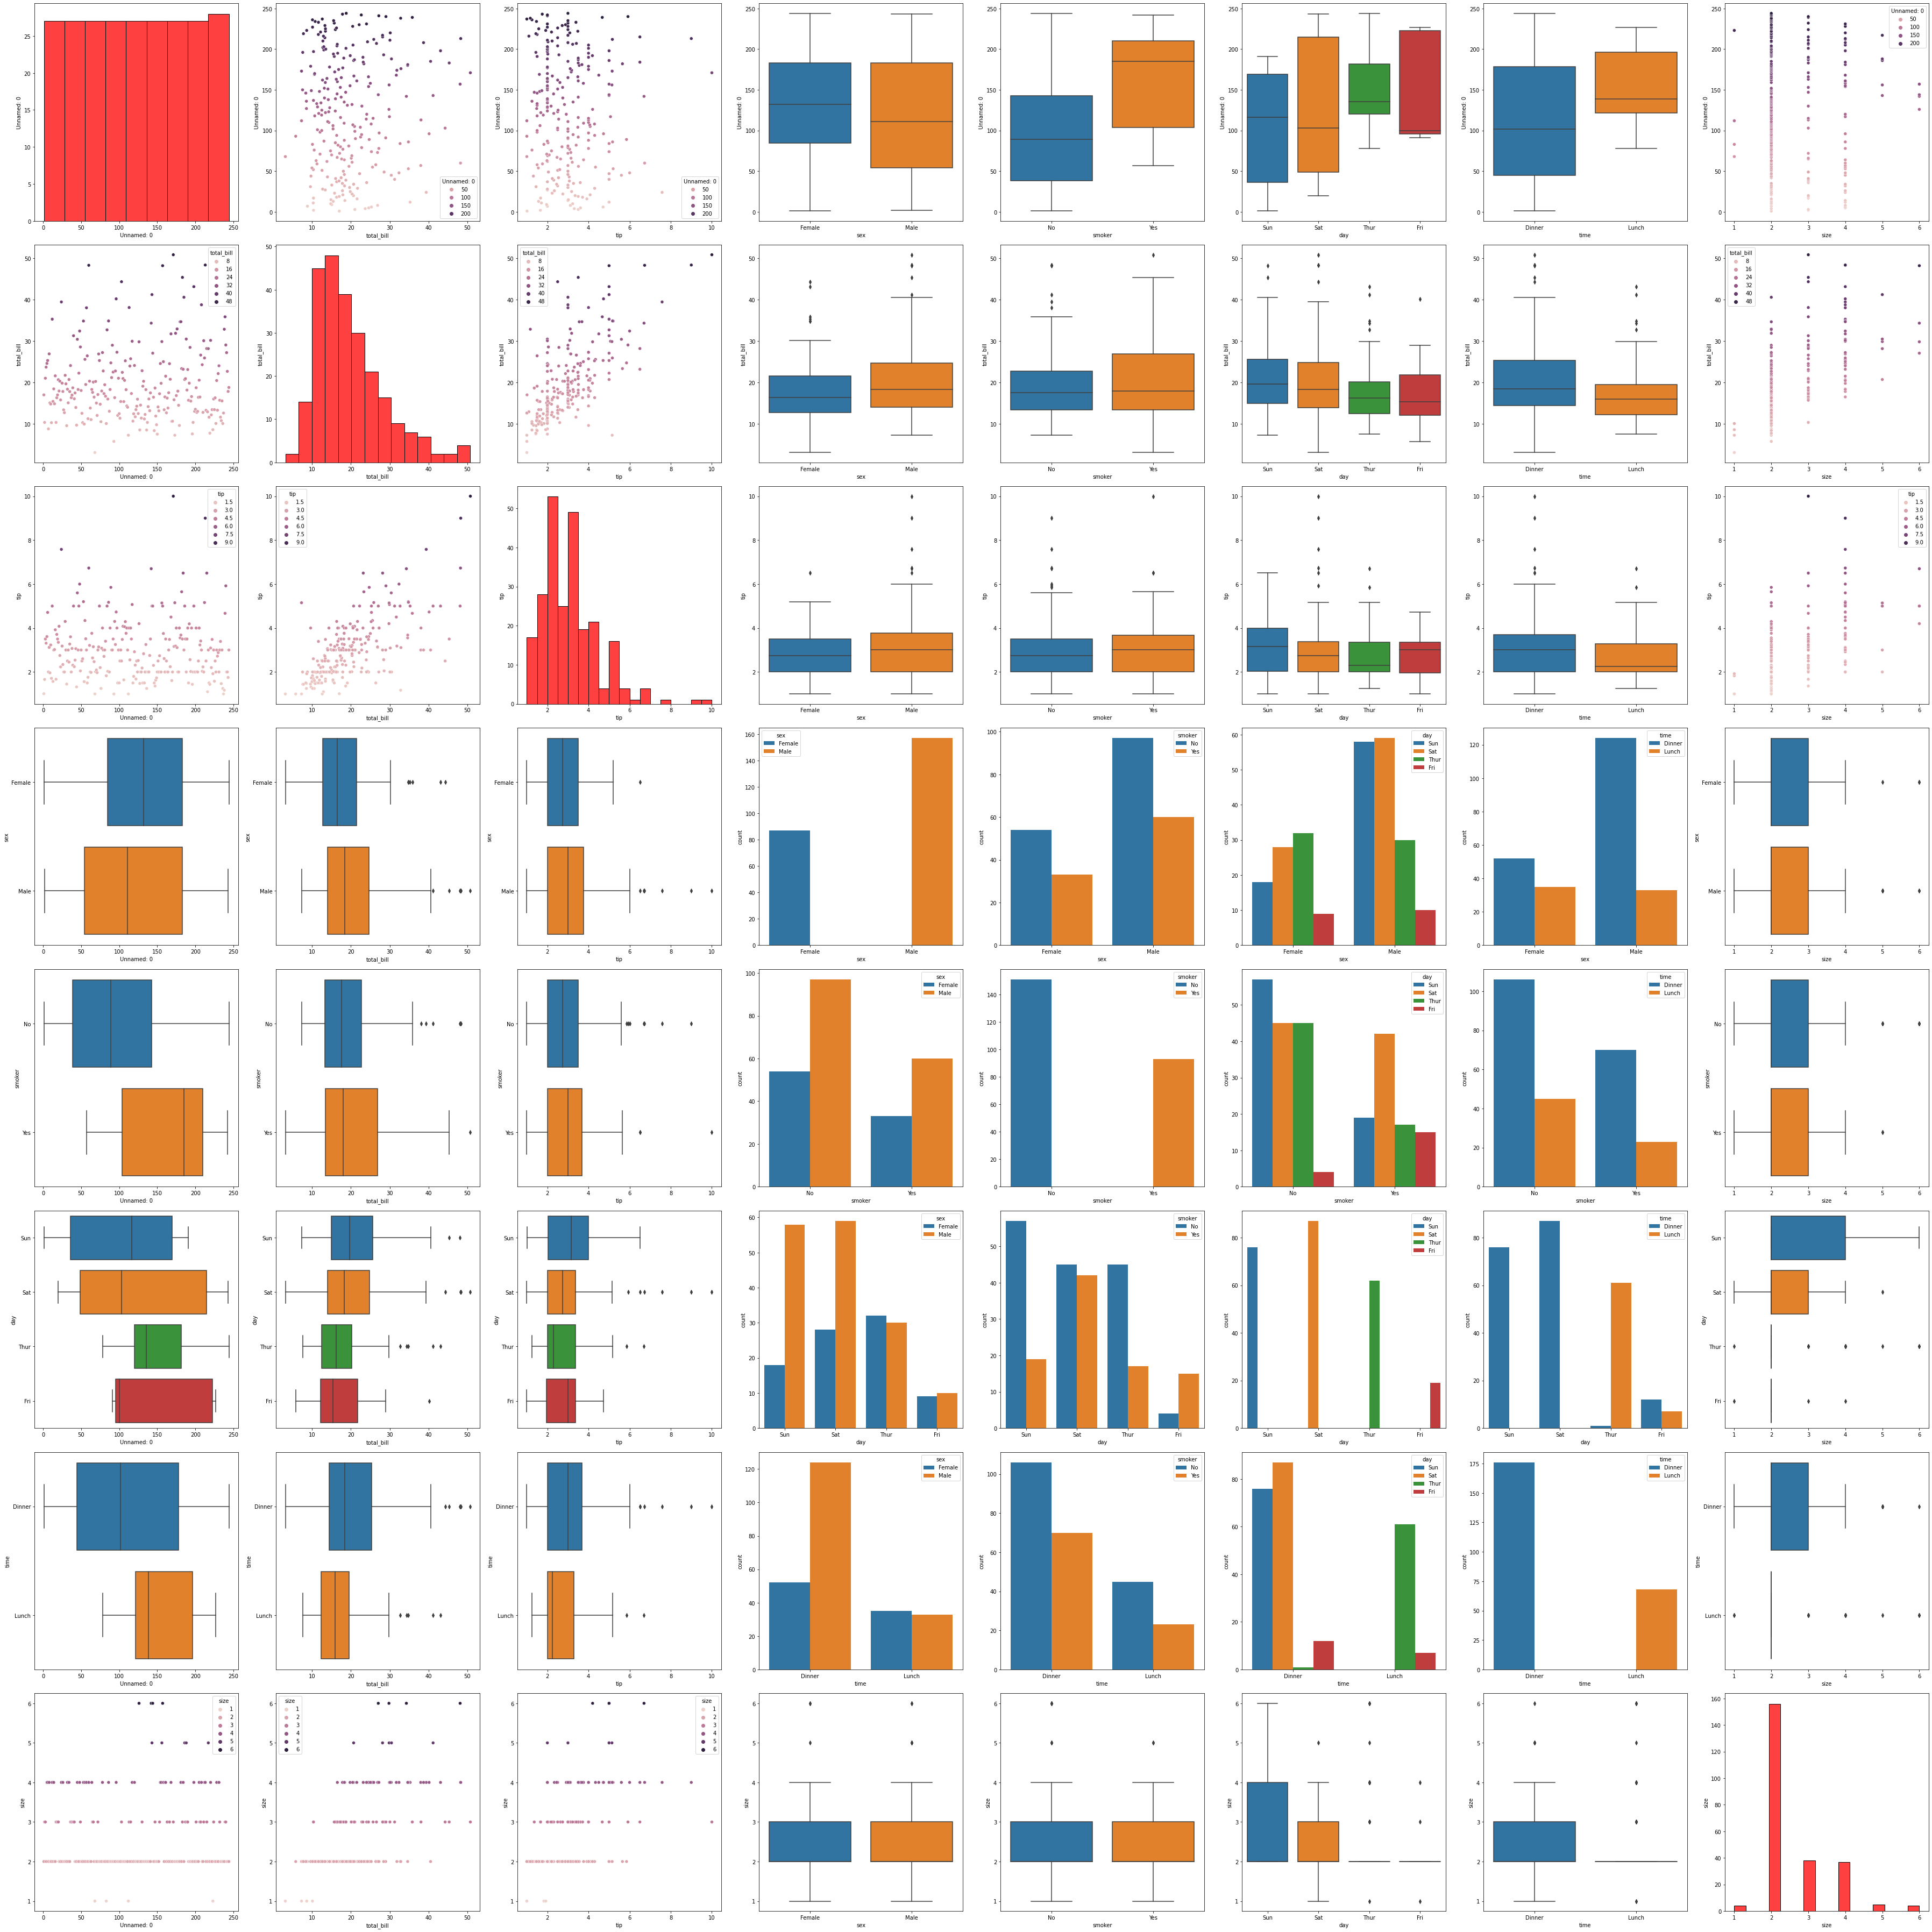

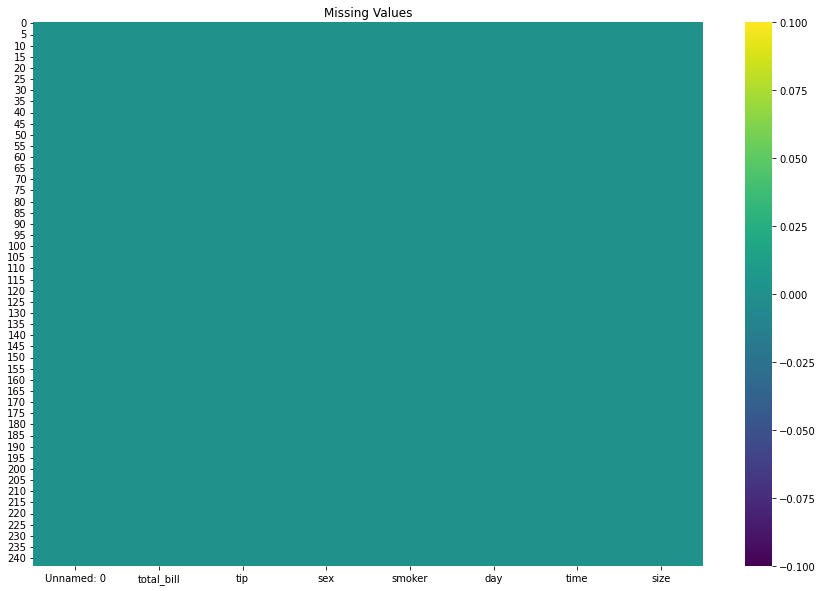

In [10]:
# Running vizDDA on the tips dataset

vizDDA(tips)

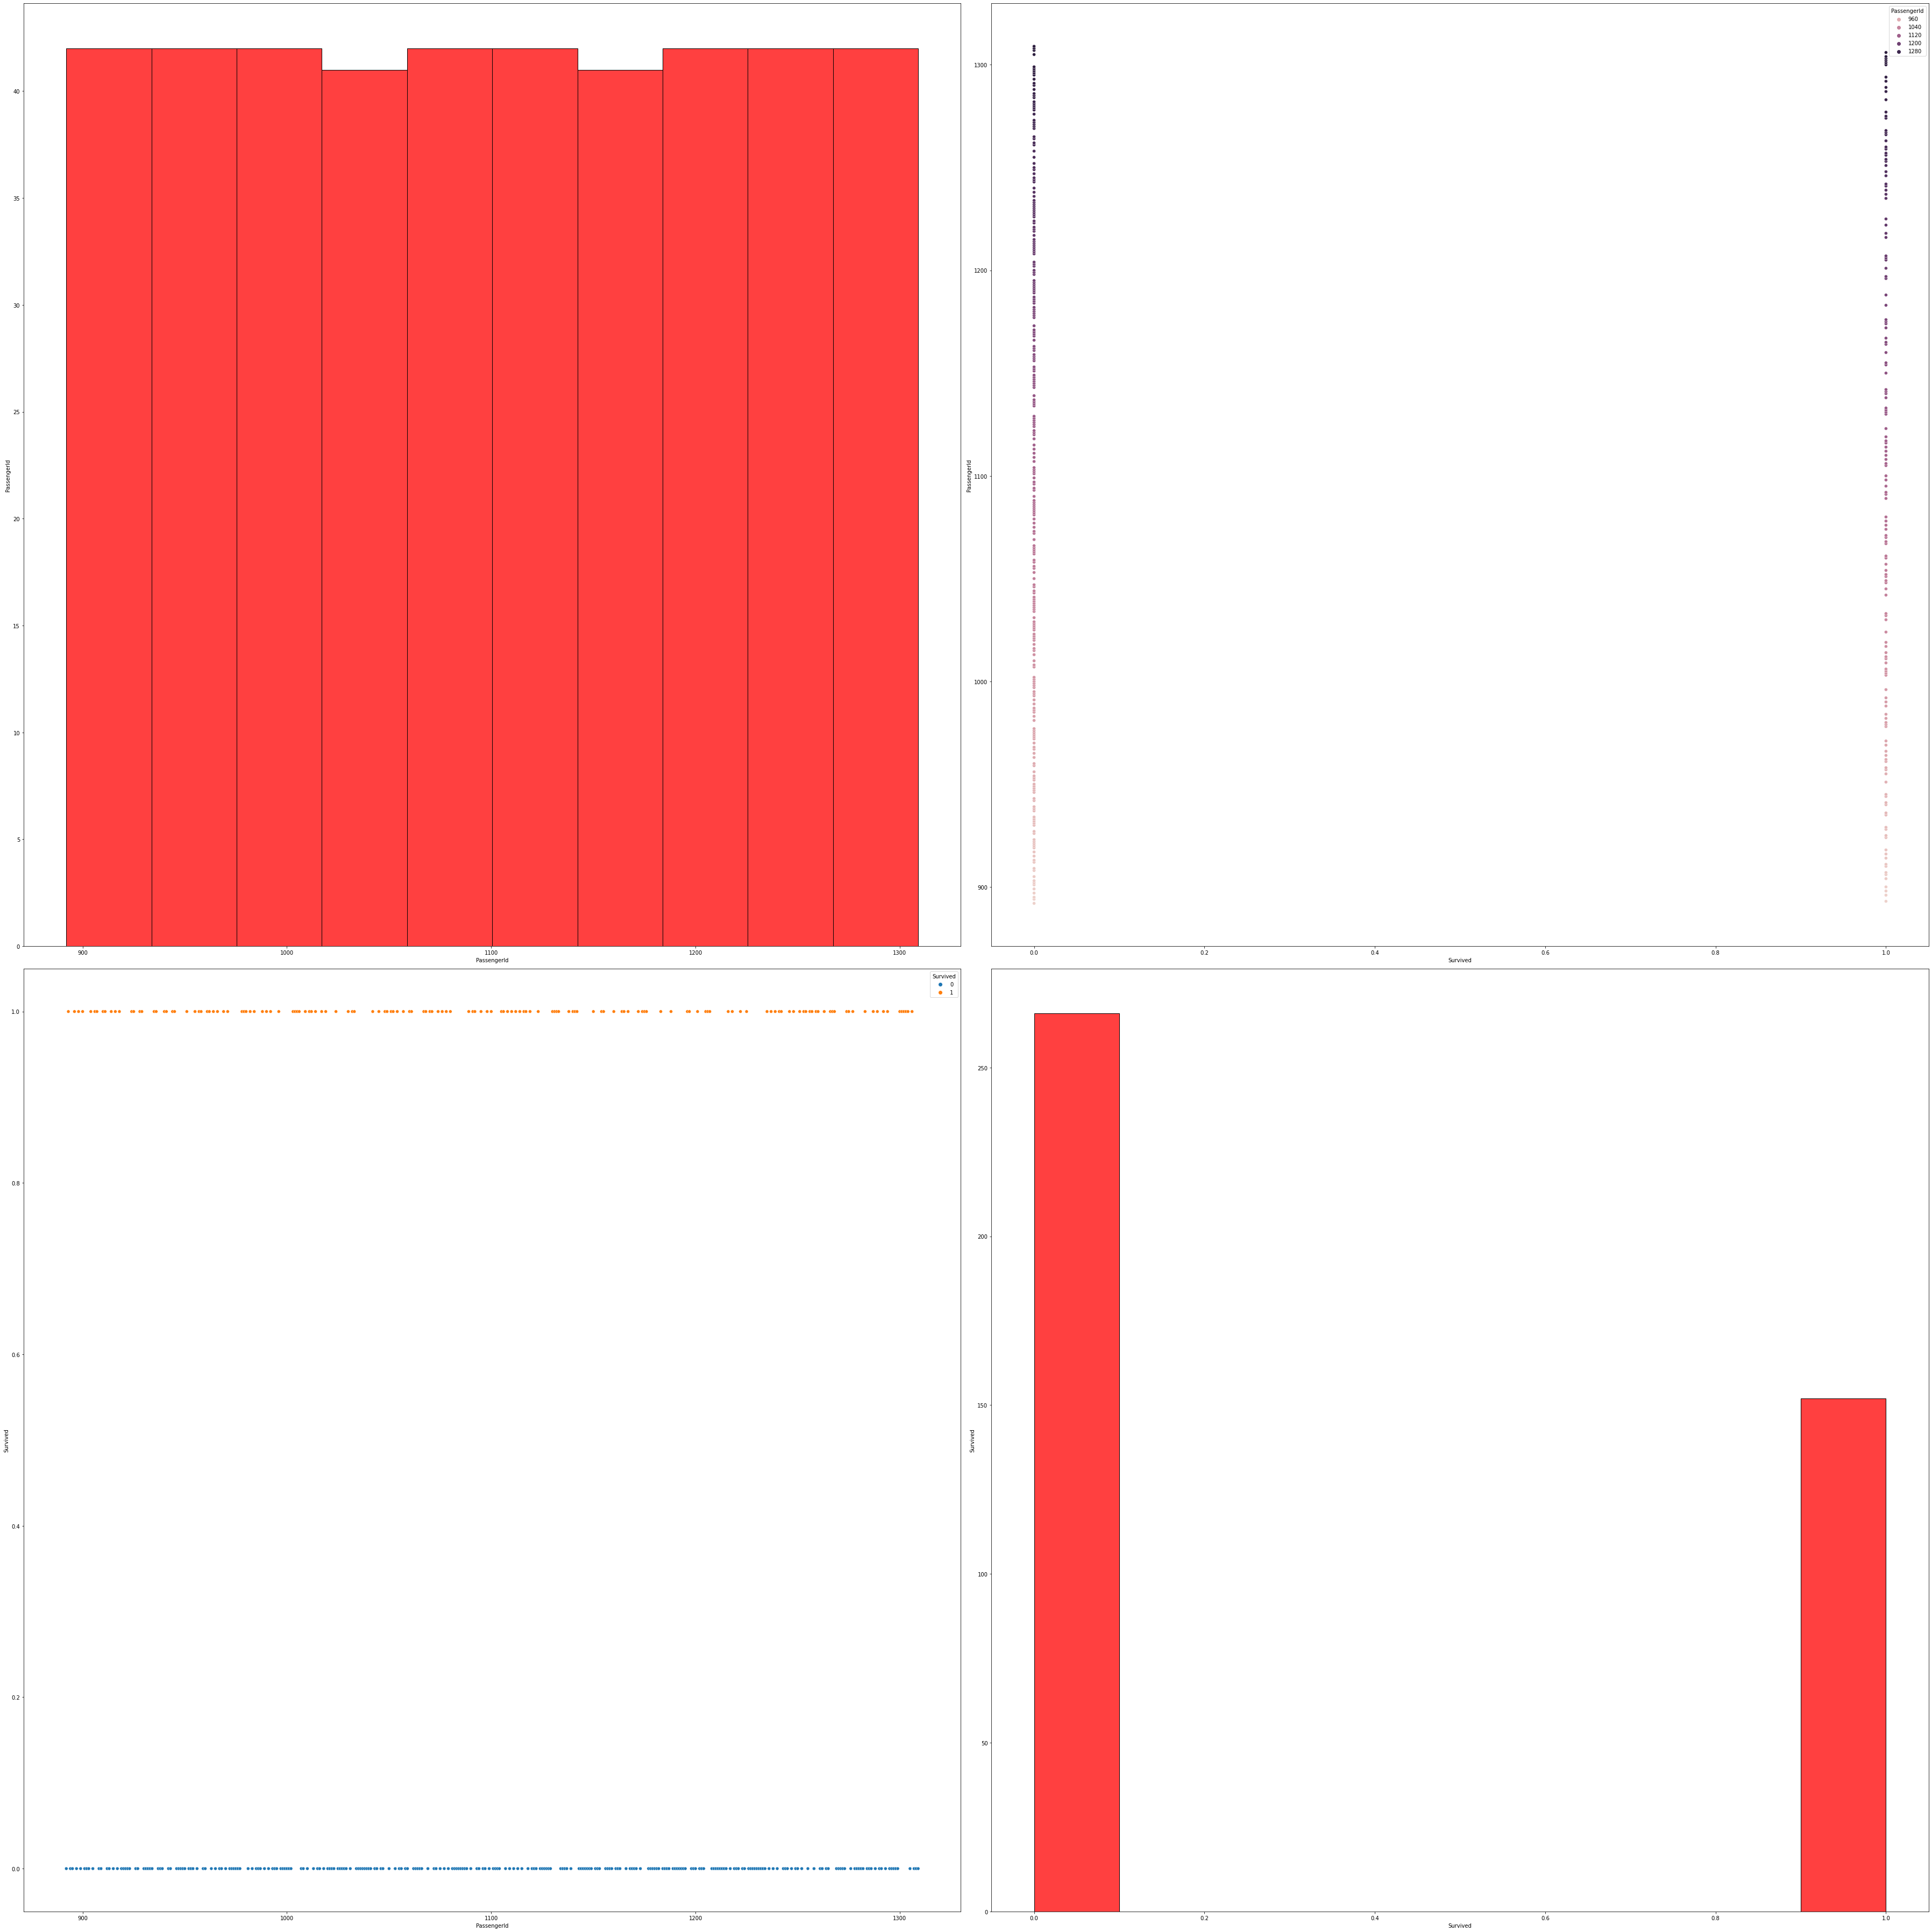

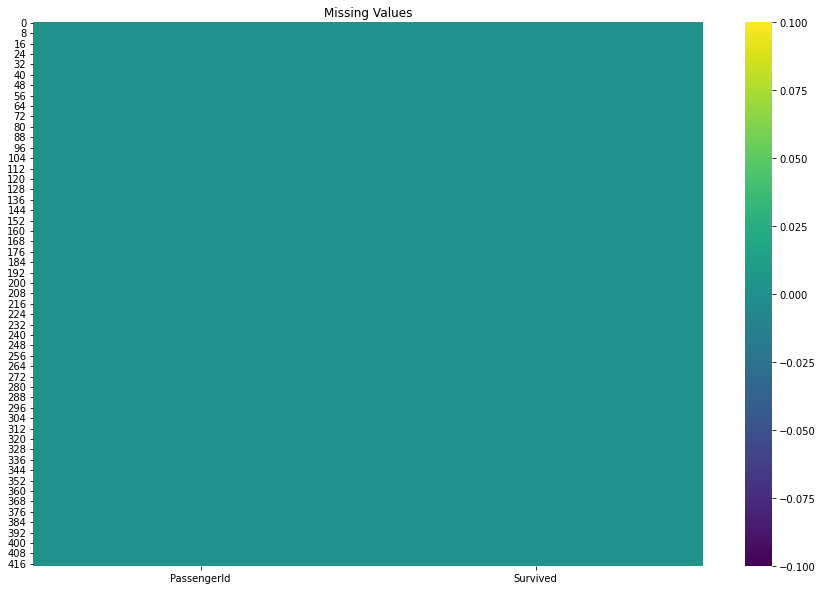

In [11]:
# Running vizDDA on the gender submission df 
vizDDA(gender_sub)

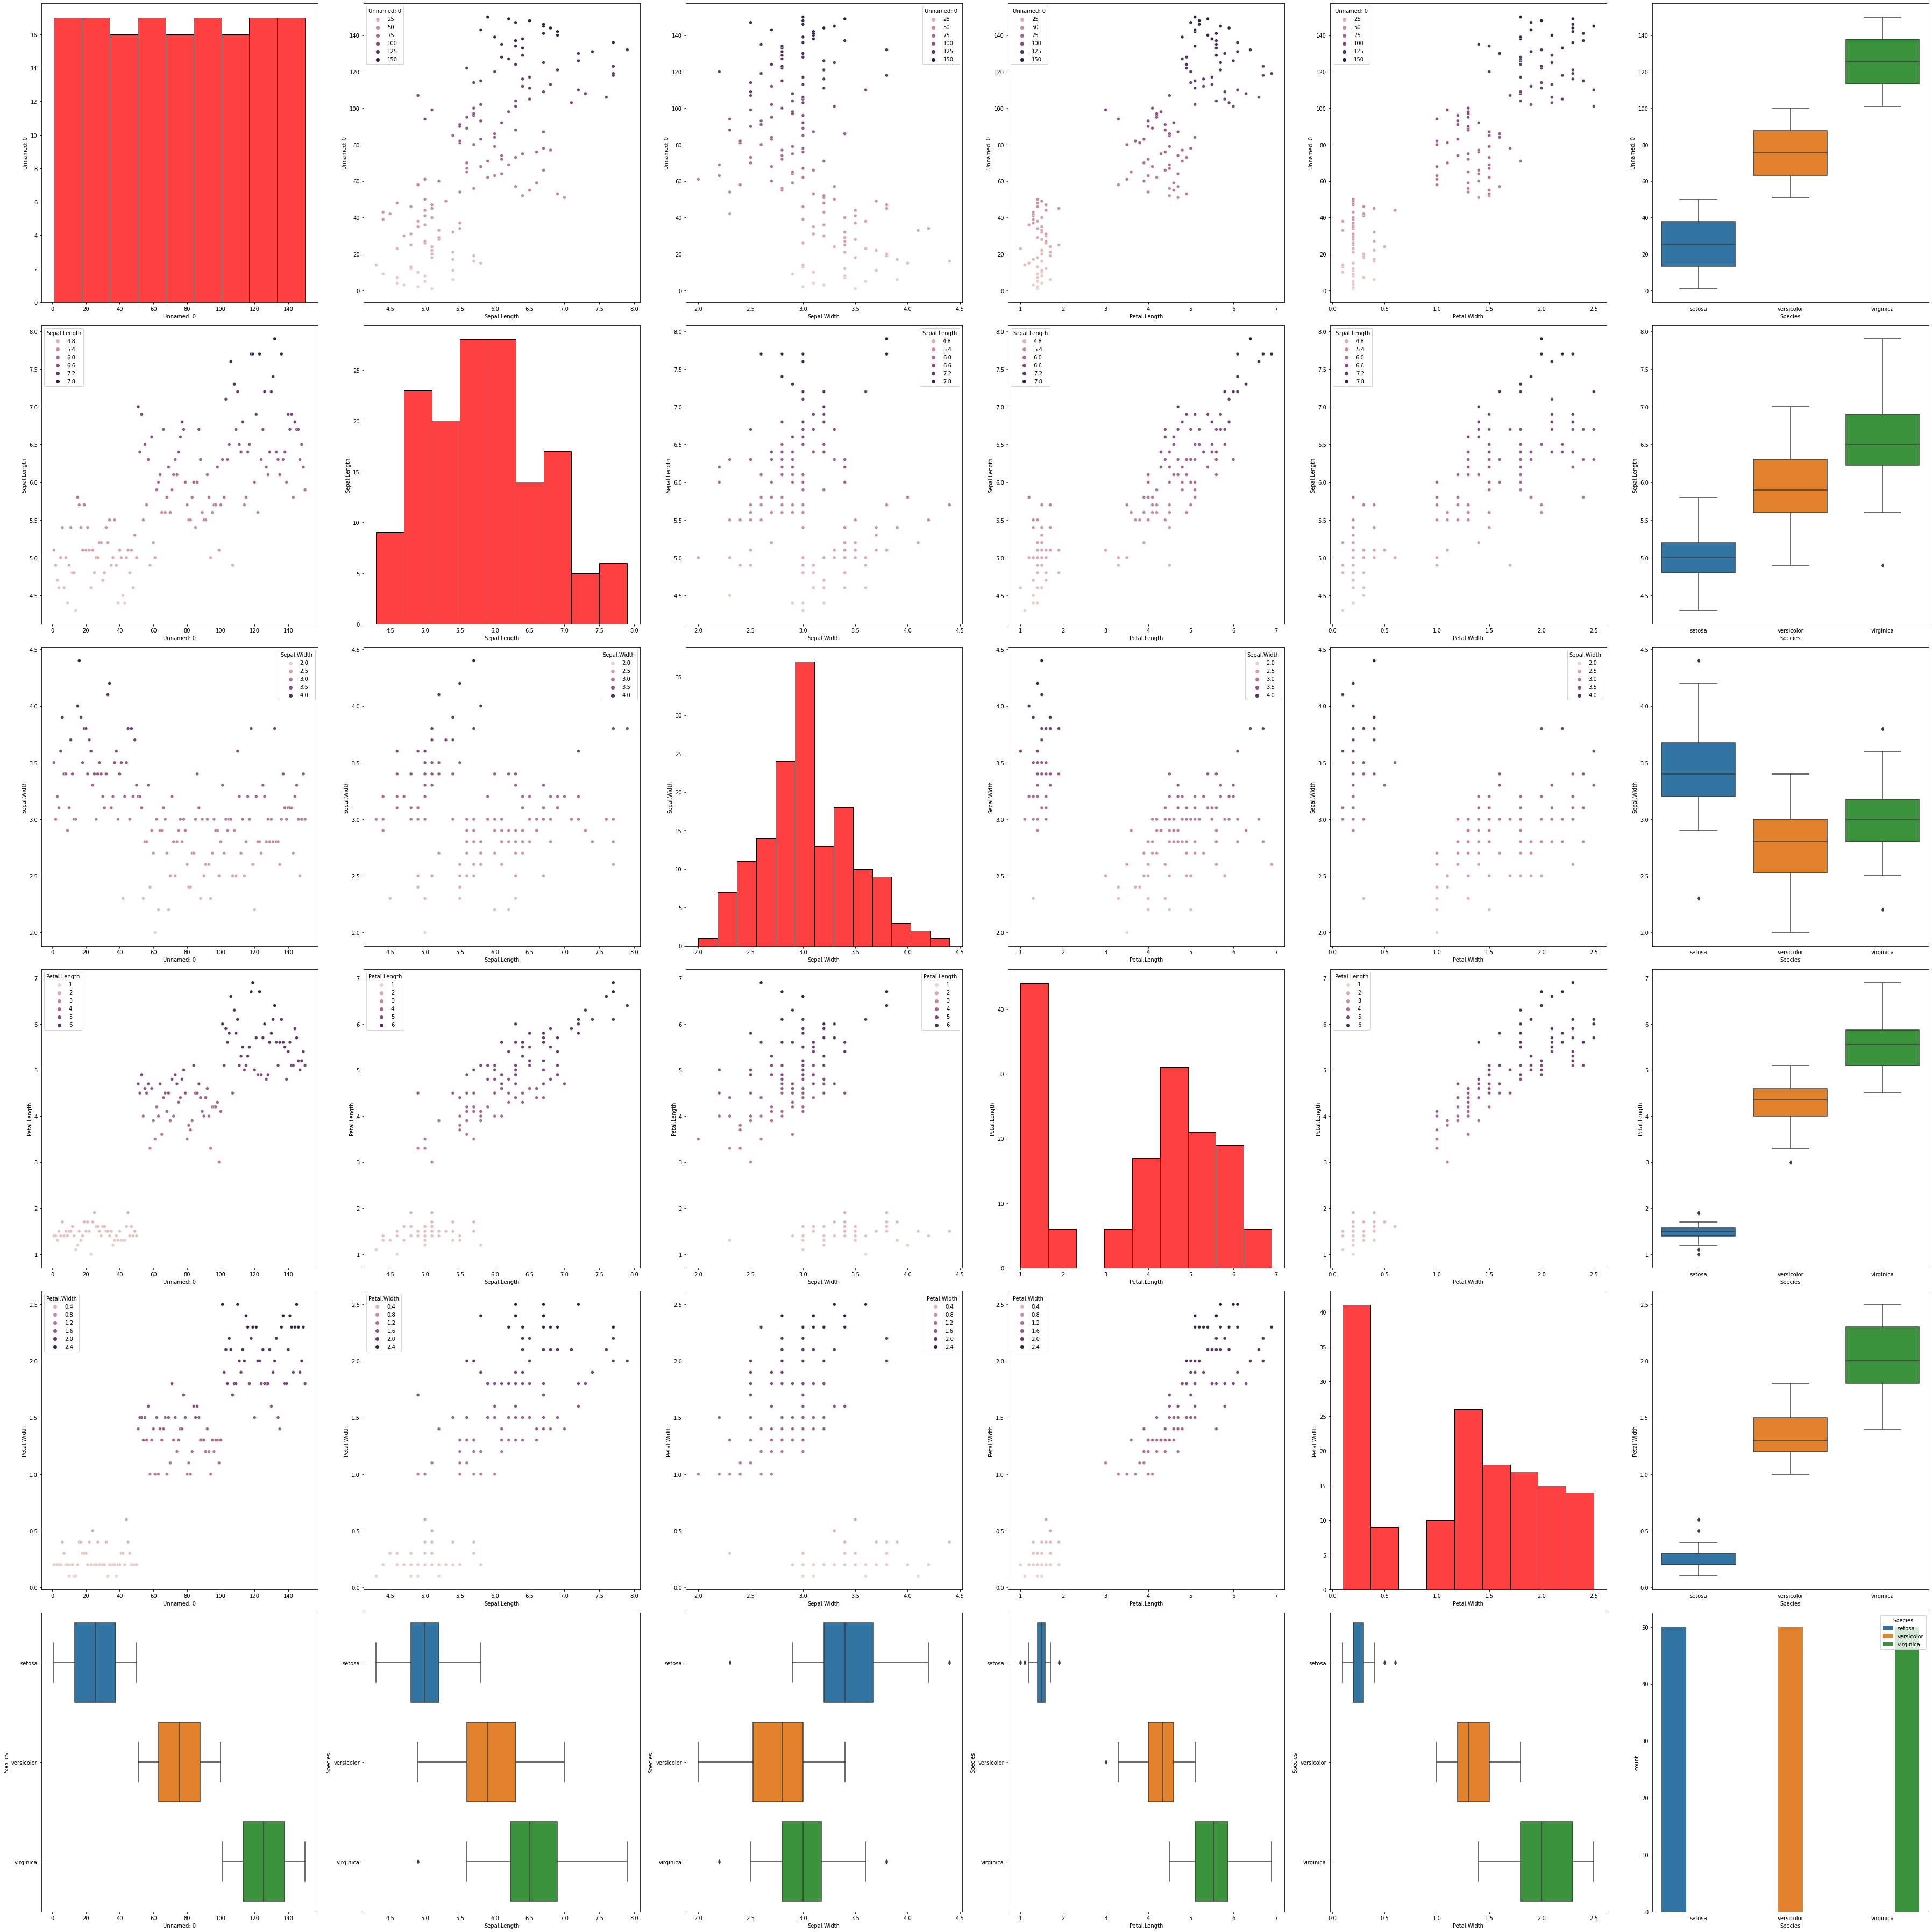

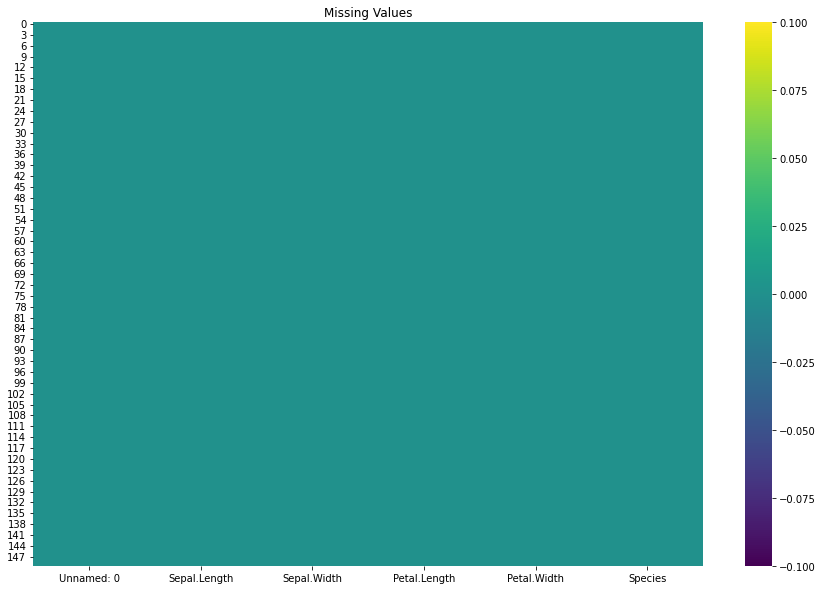

In [12]:
# Running vizDDA on the iris dataset
vizDDA(iris)

# Part 3: Missing Values per Observation (1 marks)

In [13]:
# This function takes a pandas DataFrame as input and finds all the missing values in each observation it also performs both quantDDA and vizDDA on them

def missingValues(df):
    # Create a copy of the input DataFrame t
    df_copy = df.copy()
    
    # Create a new column in the DataFrame called "MissingValuesCount"
    df_copy["MissingValuesCount"] = df_copy.isna().sum(axis=1)
    
    # Call the functions quantDDA() and vizDDA() on the input DataFrame.
    df_quant = quantDDA(df_copy)
    df_viz = pd.DataFrame(vizDDA(df_copy))
    # Repeat the previous step of counting missing values and adding them to a new column for the output DataFrames from quantDDA() and vizDDA().
    df_quant["MissingValuesCount"] =df_quant.isna().sum(axis=1)
    df_viz["MissingValuesCount"] =df_viz.isna().sum(axis=1)


    # Since we need to return the dataframe in quantDDA(), we will return it here as well
    return df_quant


,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size,MissingValuesCount
Number of Observations,244,244,244,244,244,244,244,244,0
Number of Entries,244,244,244,244,244,244,244,244,0
Number of Unique Entries,244,229,123,2,2,4,2,6,0
Number of Missing Entries,0,0,0,0,0,0,0,0,0
Number of Outliers,0,9,9,0,0,0,0,9,0
Number of Extreme Values,0,0,2,0,0,0,0,0,0
Mode,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",[13.42],[2.0],[Male],[No],[Sat],[Dinner],[2.0],0
Mean,122.5,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672,4
Standard Deviation,70.580923,8.902412,1.383638,NaN,NaN,NaN,NaN,0.9511,4
Maximum,244.0,50.81,10.0,NaN,NaN,NaN,NaN,6.0,4


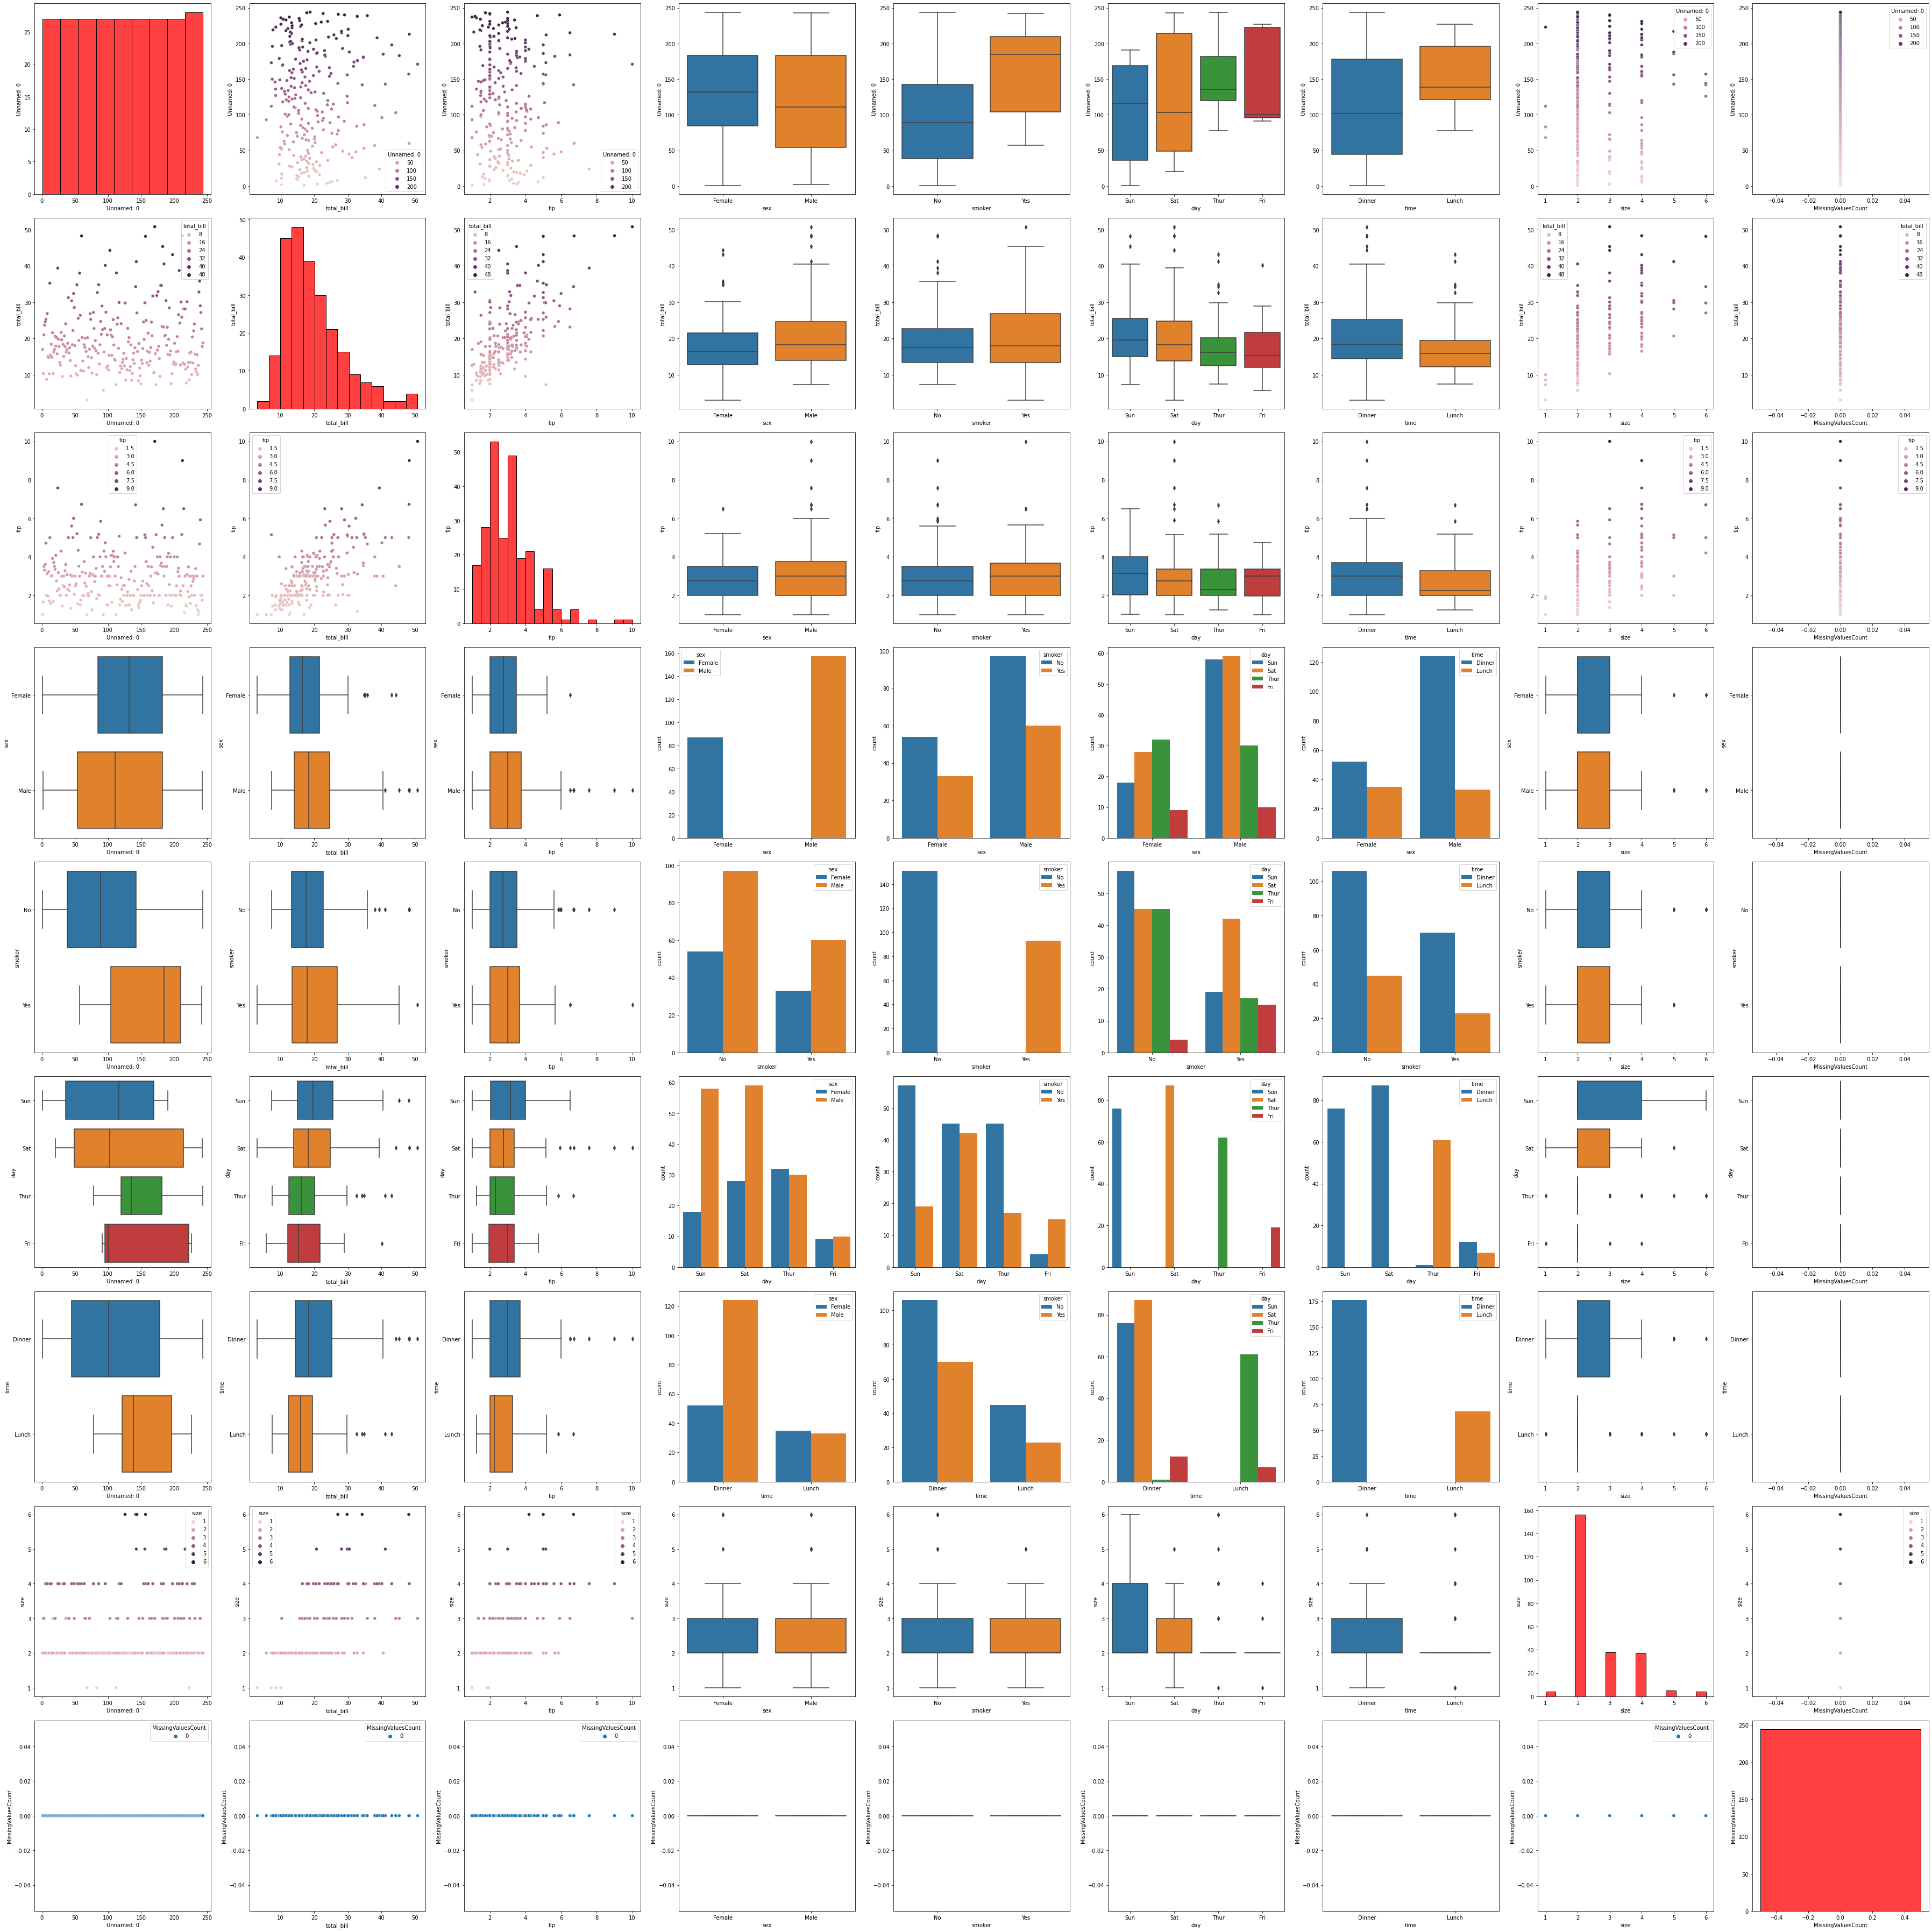

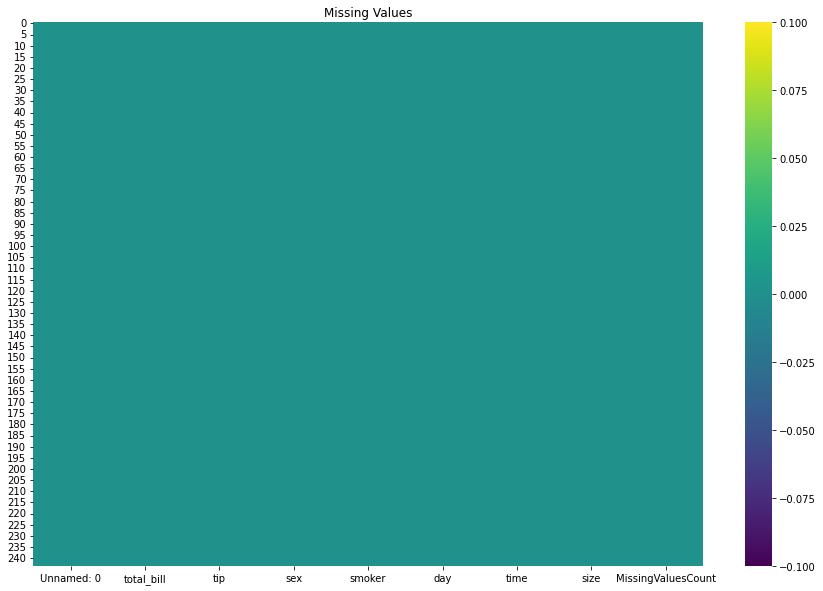

In [14]:
# Running the missingValues function on the tips df 
missingValues(tips)


,PassengerId,Survived,MissingValuesCount
Number of Observations,418,418,0
Number of Entries,418,418,0
Number of Unique Entries,418,2,0
Number of Missing Entries,0,0,0
Number of Outliers,0,0,0
Number of Extreme Values,0,0,0
Mode,"[892, 893, 894, 895, 896, 897, 898, 899, 900, ...",[0.0],0
Mean,1100.5,0.363636,0
Standard Deviation,120.810458,0.481622,0
Maximum,1309,1,0


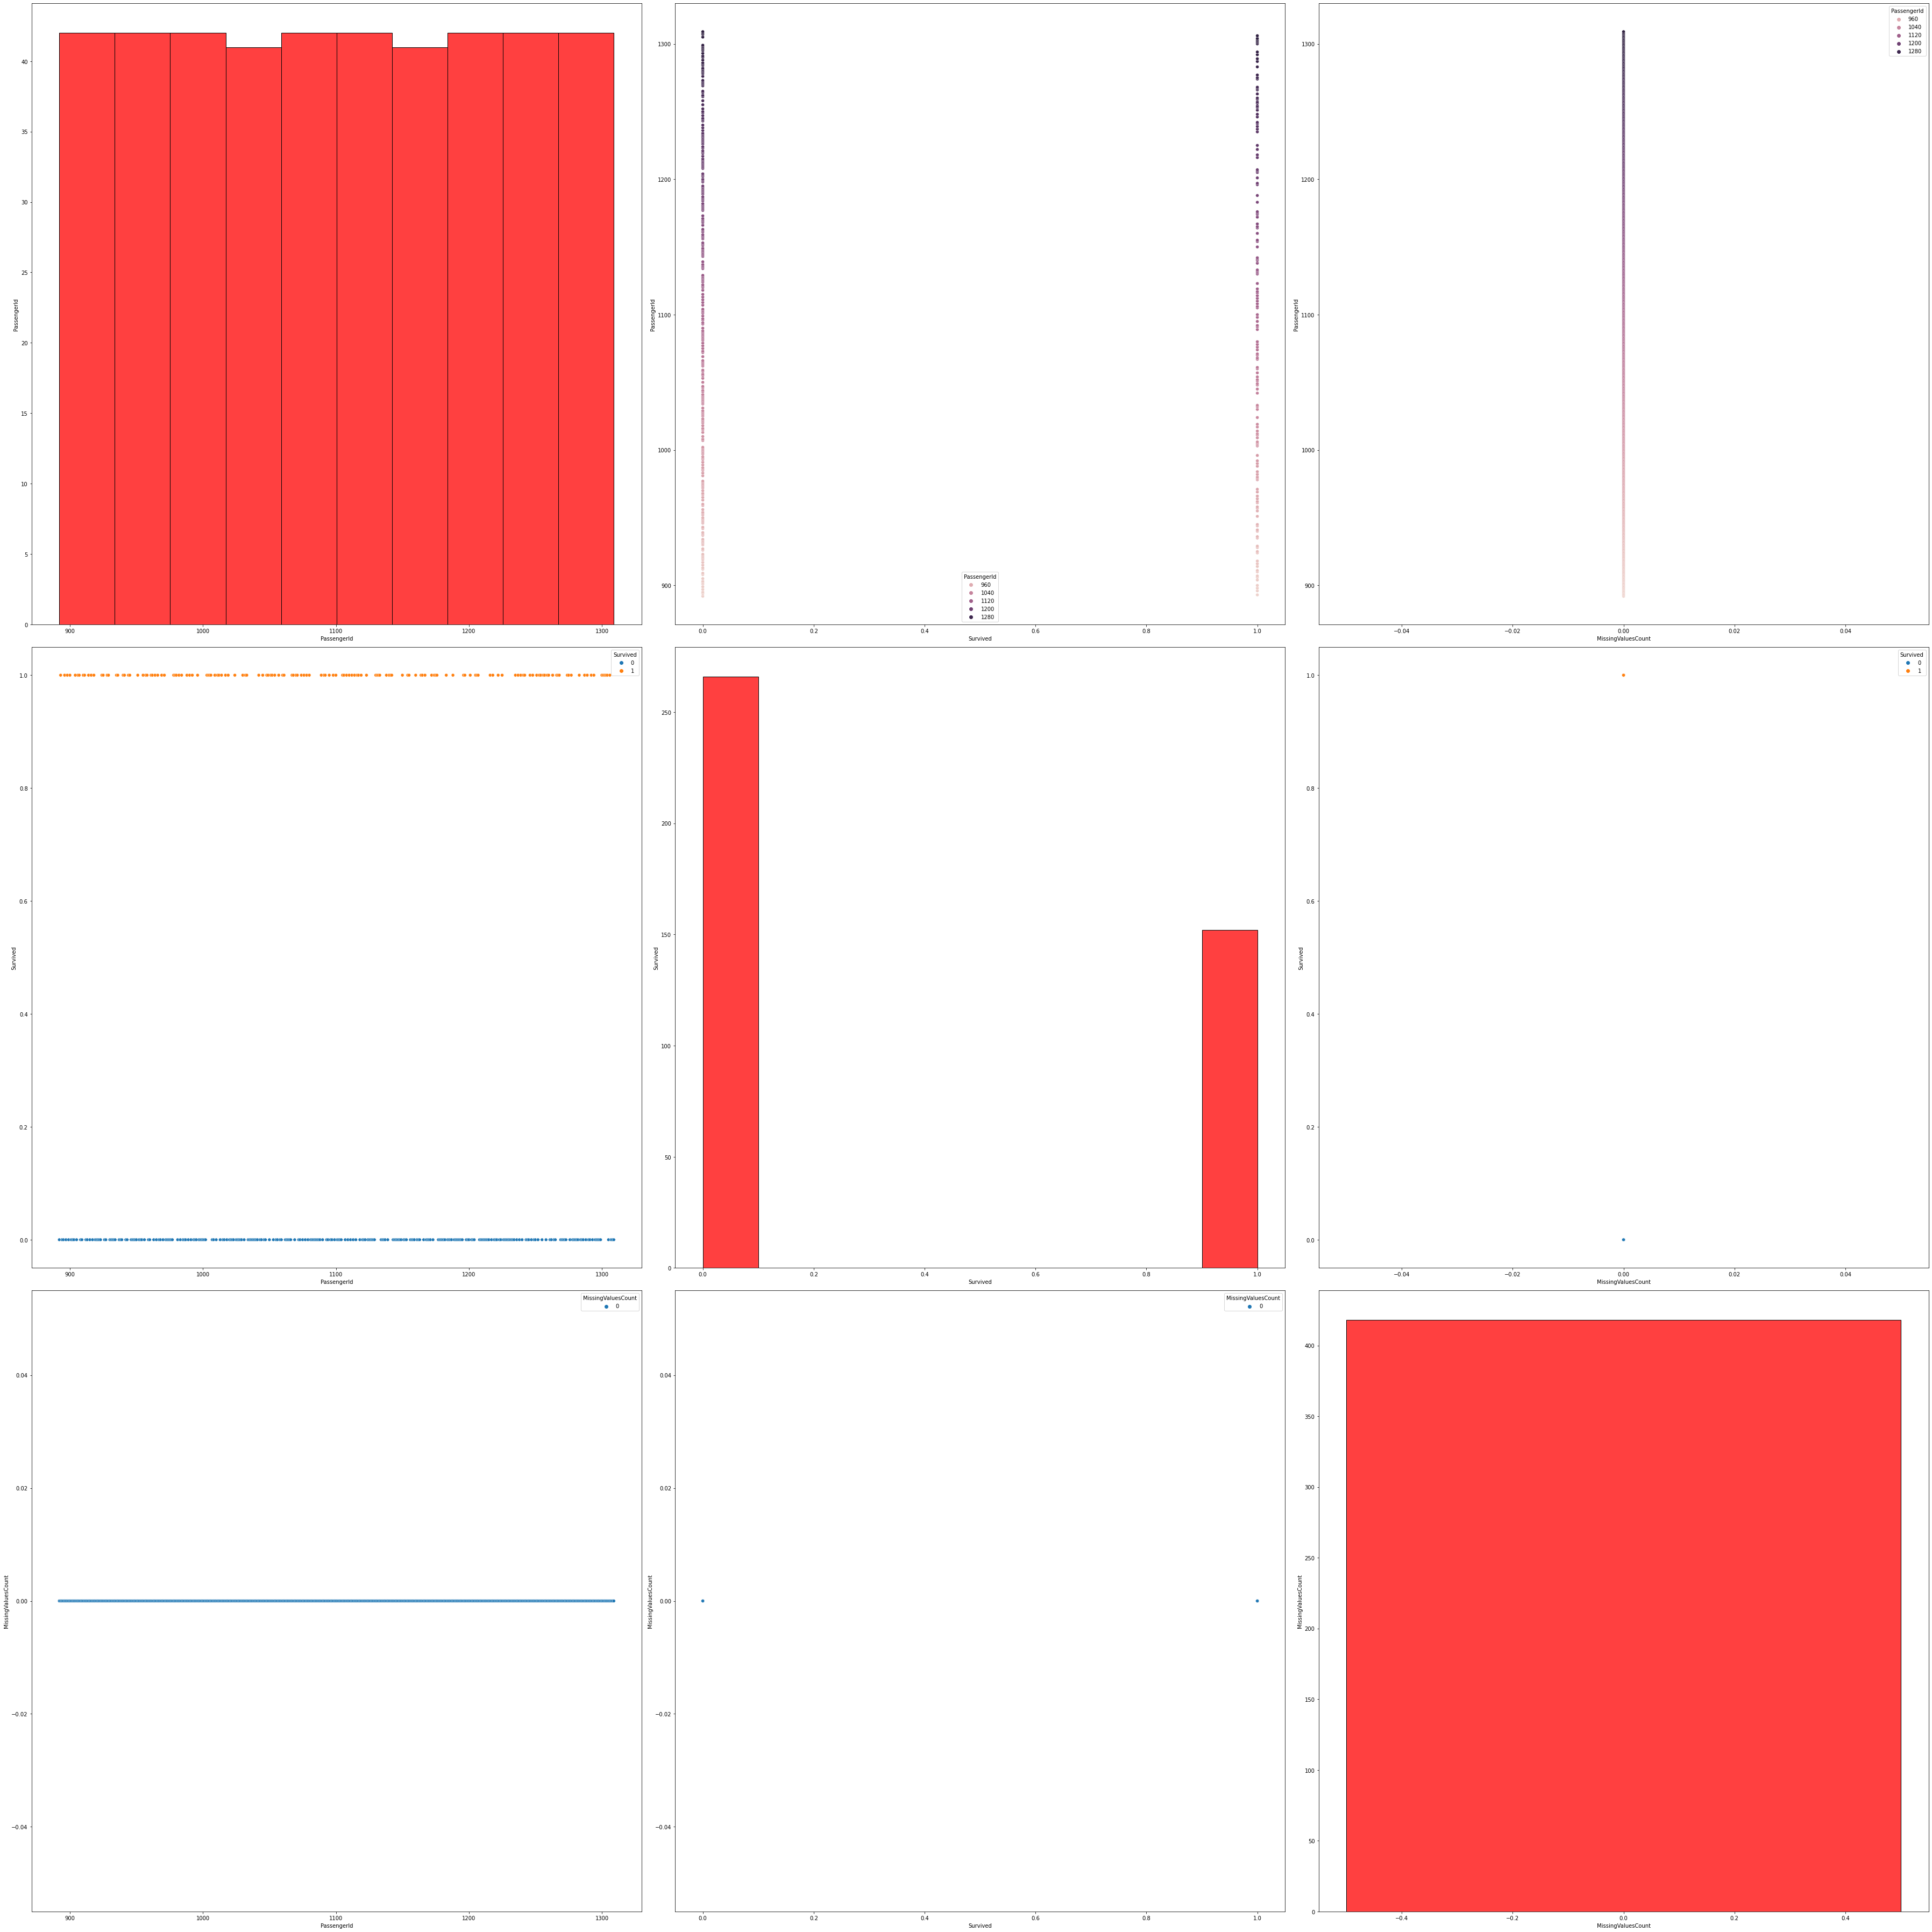

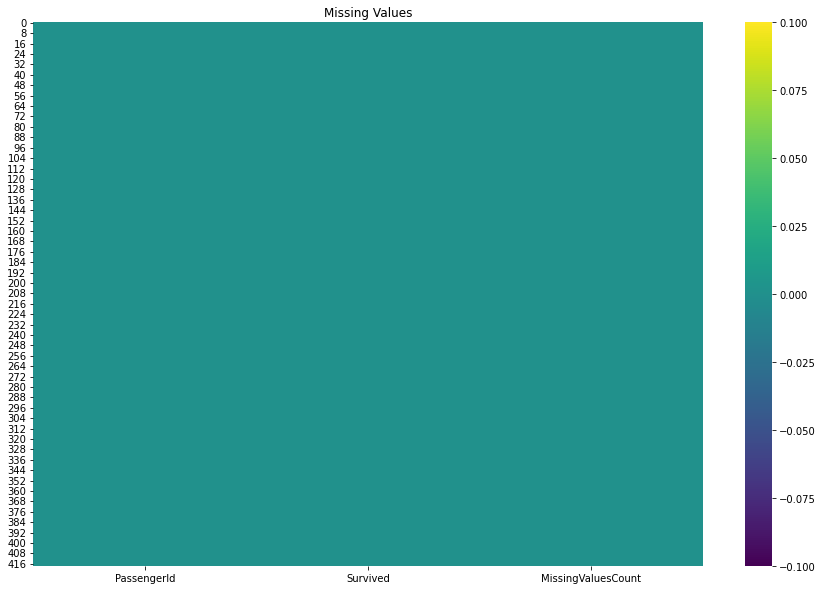

In [15]:
# Running the missingValues on the gender submission dataset

missingValues(gender_sub)

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,MissingValuesCount
Number of Observations,150,150,150,150,150,150,0
Number of Entries,150,150,150,150,150,150,0
Number of Unique Entries,150,35,23,43,22,3,0
Number of Missing Entries,0,0,0,0,0,0,0
Number of Outliers,0,0,4,0,0,0,0
Number of Extreme Values,0,0,0,0,0,0,0
Mode,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",[5.0],[3.0],"[1.4, 1.5]",[0.2],"[setosa, versicolor, virginica]",0
Mean,75.5,5.843333,3.057333,3.758,1.199333,NaN,1
Standard Deviation,43.445368,0.828066,0.435866,1.765298,0.762238,NaN,1
Maximum,150.0,7.9,4.4,6.9,2.5,NaN,1


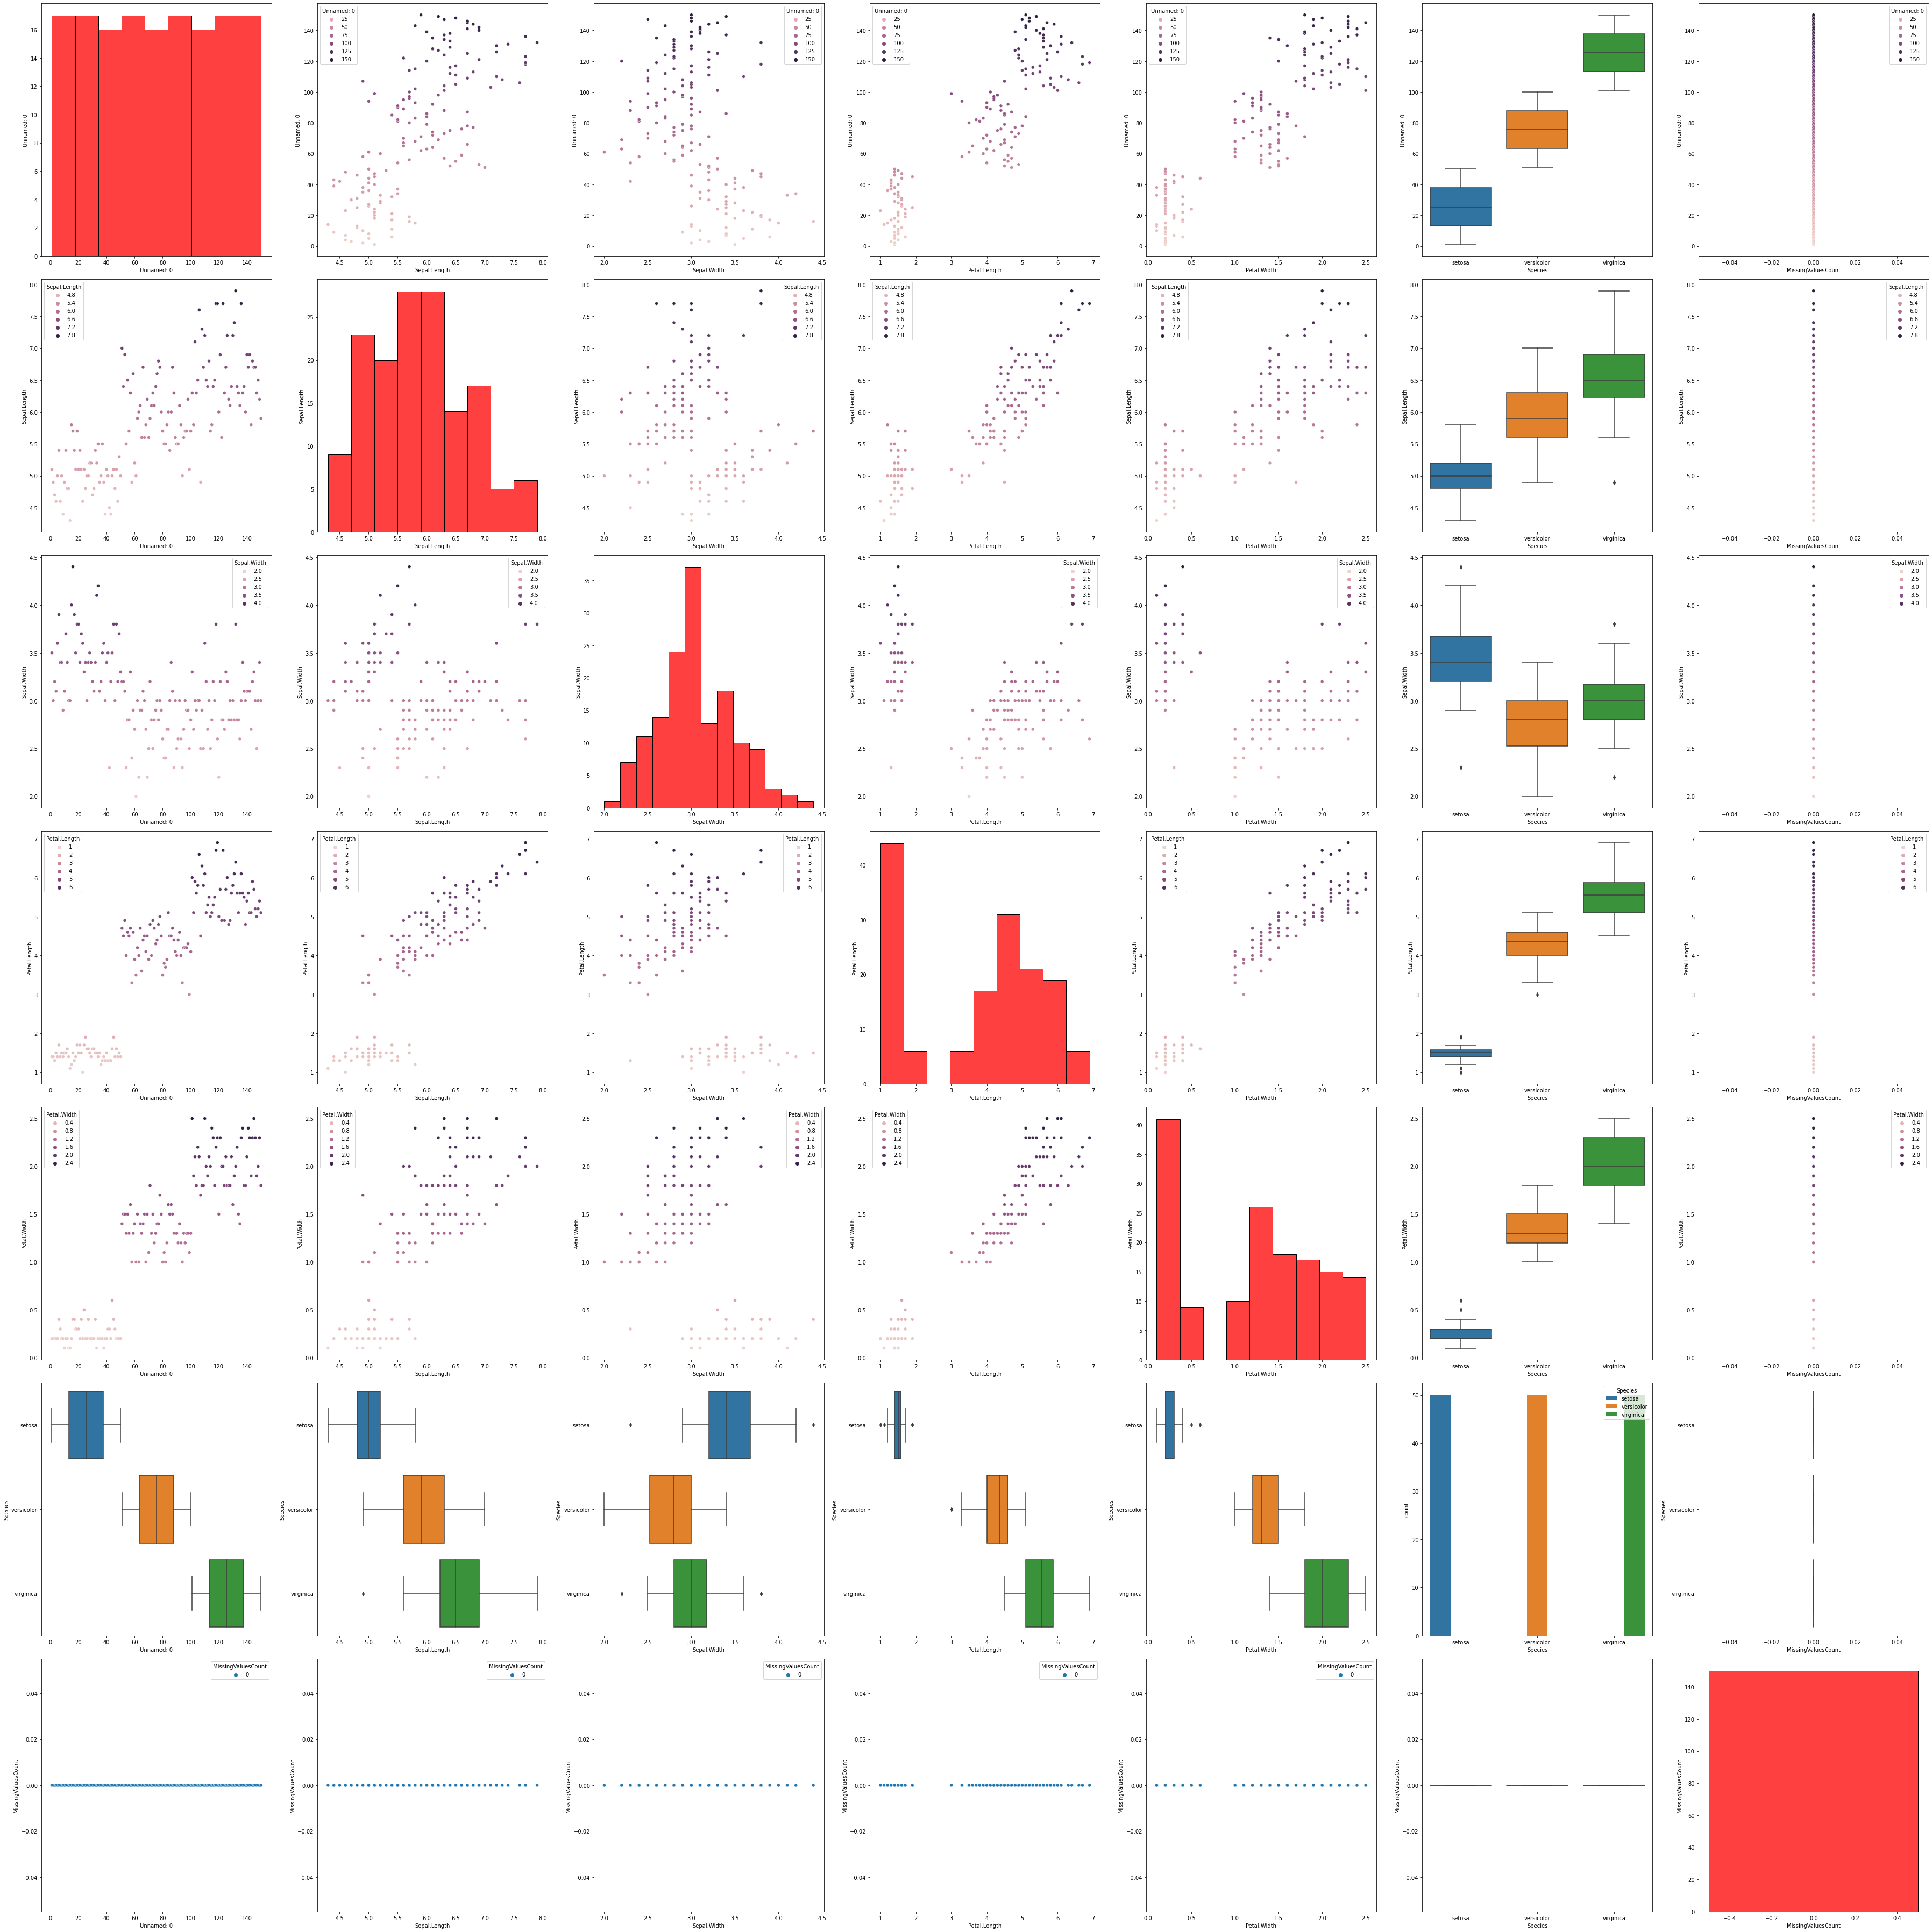

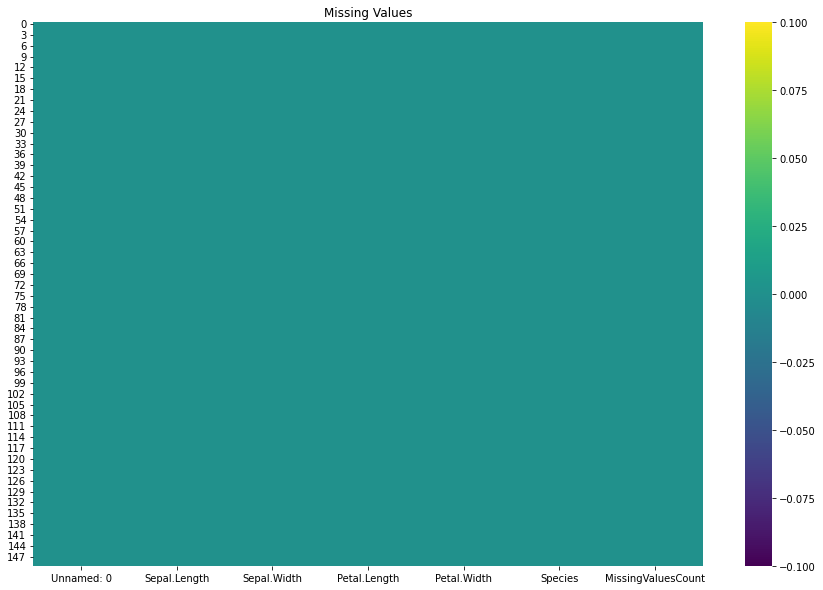

In [16]:
# Running the missingValues function on the iris df
missingValues(iris)